In [77]:
%reload_ext autoreload
%autoreload 2

In [78]:
import os
import sys
import glob
import json
import datetime
import nltk
nltk.download('stopwords')
nltk.download('stopwords')
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /home/habte/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /home/habte/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import SlackDataLoader
import src.utils as utils
import src.plotter as plotter

[nltk_data] Downloading package stopwords to /home/habte/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/habte/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [80]:
import pandas as pd
json_file_path = '/home/habte/Desktop/Anonymized_B6SlackExport_25Nov23/anonymized/channels.json'
data = pd.read_json(json_file_path)

In [81]:
data.head()

,id,name,created,creator,is_archived,is_general,members,topic,purpose,pins
0,C03T0APHX63,all-community-building,1660301317,U03TEPYRM2P,False,False,"[U03T89ACUUW, U03TEPYRM2P, U03TNP8Q8CT, U03TT5...","{'value': '', 'creator': '', 'last_set': 0}","{'value': '', 'creator': '', 'last_set': 0}",NaN
1,C03T0AX4K6K,all-technical-support,1660301462,U03TEPYRM2P,False,False,"[U03T89ACUUW, U03TEPYRM2P, U03TNP8Q8CT, U03TT5...","{'value': '', 'creator': '', 'last_set': 0}","{'value': '', 'creator': '', 'last_set': 0}",NaN
2,C03T89KDGA2,all-career-exercises,1660301361,U03TEPYRM2P,False,False,"[U03T89ACUUW, U03TEPYRM2P, U03TNP8Q8CT, U03TT5...","{'value': '', 'creator': '', 'last_set': 0}","{'value': '', 'creator': '', 'last_set': 0}","[{'id': '1663839365.770289', 'type': 'C', 'cre..."
3,C03T89PMJKG,all-resources,1660301441,U03TEPYRM2P,False,False,"[U03T89ACUUW, U03TEPYRM2P, U03TNP8Q8CT, U03TT5...","{'value': '', 'creator': '', 'last_set': 0}","{'value': '', 'creator': '', 'last_set': 0}","[{'id': '1667584331.857749', 'type': 'C', 'cre..."
4,C03TBUCU4UD,random,1660300985,U03TEPYRM2P,False,False,"[U03T89ACUUW, U03TEPYRM2P, U03TNP8Q8CT, U03TT5...","{'value': '', 'creator': '', 'last_set': 0}","{'value': 'This channel is for... well, everyt...",NaN


In [82]:
data.tail()

,id,name,created,creator,is_archived,is_general,members,topic,purpose,pins
34,C049RETDA31,all-de-week12,1668000519,U03TEPYRM2P,False,False,"[U03TEPYRM2P, U03U1FNPEUX, U03U1HAG9TR, U03U1J...","{'value': '', 'creator': '', 'last_set': 0}","{'value': '', 'creator': '', 'last_set': 0}",NaN
35,C04A3FV2L1F,all-week12,1667798997,U03TEPYRM2P,False,False,"[U03T89ACUUW, U03TEPYRM2P, U03TNP8Q8CT, U03TT5...","{'value': '', 'creator': '', 'last_set': 0}","{'value': '', 'creator': '', 'last_set': 0}",NaN
36,C04AJMGPU01,all-web3-week12,1668000999,U03TEPYRM2P,False,False,"[U03TEPYRM2P, U03U9DB7REG, U03UJGRN5E0, U03UKL...","{'value': '', 'creator': '', 'last_set': 0}","{'value': '', 'creator': '', 'last_set': 0}",NaN
37,C04BFKFETA9,machine-learning,1668759897,U03UL5LSTG9,False,False,"[U03T89ACUUW, U03TEPYRM2P, U03TT5KEYCF, U03U4G...","{'value': '', 'creator': '', 'last_set': 0}","{'value': '', 'creator': '', 'last_set': 0}",NaN
38,C04BM2JS9DJ,data-engineering,1668760175,U03UL5LSTG9,False,False,"[U03T89ACUUW, U03TEPYRM2P, U03TNP8Q8CT, U03TT5...","{'value': '', 'creator': '', 'last_set': 0}","{'value': '', 'creator': '', 'last_set': 0}",NaN


In [83]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
created,39.0,1.663885e+09,2.931766e+06,1.660301e+09,1.661735e+09,1.662985e+09,1.667048e+09,1.668760e+09


In [84]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,39,39,C03T0APHX63,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,39,39,all-community-building,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created,39.0,NaN,NaN,NaN,1663885447.641026,2931765.578985,1660300985.0,1661735190.0,1662984641.0,1667047811.0,1668760175.0
creator,39,15,U03TEPYRM2P,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_archived,39,2,False,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_general,39,2,False,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
members,39,24,"[U03T89ACUUW, U03TEPYRM2P, U03TNP8Q8CT, U03TT5...",16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
topic,39,3,"{'value': '', 'creator': '', 'last_set': 0}",37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose,39,5,"{'value': '', 'creator': '', 'last_set': 0}",35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pins,9,9,"[{'id': '1663839365.770289', 'type': 'C', 'cre...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# Initialize DataLoader
sl = SlackDataLoader('/home/habte/Desktop/Anonymized_B6SlackExport_25Nov23/anonymized/')

In [86]:
df = sl.slack_parser('/home/habte/Desktop/Anonymized_B6SlackExport_25Nov23/anonymized')
print(df.shape)
df.head()

(7613, 13)


,msg_type,msg_content,sender_name,msg_sent_time,msg_dist_type,time_thread_start,reply_count,reply_users_count,reply_users,tm_thread_end,msg_sent_time_timestamp,time_thread_start_timestamp,channel
0,message,*community Building Session REMINDER!*:timer_c...,Vanessa Norman,1667908201.093329,text,0,0,0,0,0,2022-11-08 14:50:01,0,anonymized
1,message,Hello,Daniel Brown,1667909465.193979,text,0,0,0,0,0,2022-11-08 15:11:05,0,anonymized
2,message,"We are waiting for Guest Talk to finish, just ...",Vanessa Norman,1667909531.844389,text,1667909531.844389,1,1,U03UH397319,1667909982.968049,2022-11-08 15:12:11,2022-11-08 15:12:11,anonymized
3,message,ok,Brenda Hernandez,1667909982.968049,text,1667909531.844389,0,0,0,0,2022-11-08 15:19:42,2022-11-08 15:12:11,anonymized
4,message,helo,Cristian Wilson,1667910549.026329,text,0,0,0,0,0,2022-11-08 15:29:09,0,anonymized


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   msg_type                     7613 non-null   object
 1   msg_content                  7613 non-null   object
 2   sender_name                  7613 non-null   object
 3   msg_sent_time                7613 non-null   object
 4   msg_dist_type                7613 non-null   object
 5   time_thread_start            7613 non-null   object
 6   reply_count                  7613 non-null   int64 
 7   reply_users_count            7613 non-null   int64 
 8   reply_users                  7613 non-null   object
 9   tm_thread_end                7613 non-null   object
 10  msg_sent_time_timestamp      7613 non-null   object
 11  time_thread_start_timestamp  7613 non-null   object
 12  channel                      7613 non-null   object
dtypes: int64(2), object(11)
memory us

In [88]:
df.tail()

,msg_type,msg_content,sender_name,msg_sent_time,msg_dist_type,time_thread_start,reply_count,reply_users_count,reply_users,tm_thread_end,msg_sent_time_timestamp,time_thread_start_timestamp,channel
7608,message,An accident will happen before next week .. an...,Brian Odom,1664282763.391889,text,1664282256.107799,0,0,0,0,2022-09-27 15:46:03,2022-09-27 15:37:36,anonymized
7609,message,So better submit it before the accident,Vanessa Norman,1664282804.958659,text,1664282256.107799,0,0,0,0,2022-09-27 15:46:44,2022-09-27 15:37:36,anonymized
7610,message,"You can give it to your crush , remember it sh...",Vanessa Norman,1664282835.868179,text,1664282256.107799,0,0,0,0,2022-09-27 15:47:15,2022-09-27 15:37:36,anonymized
7611,message,Haha,Miguel Herring,1664282985.529739,text,1664282338.778849,0,0,0,0,2022-09-27 15:49:45,2022-09-27 15:38:58,anonymized
7612,message,Did I say next week? I meant last week .. my p...,Brian Odom,1664283026.417909,text,1664282256.107799,0,0,0,0,2022-09-27 15:50:26,2022-09-27 15:37:36,anonymized


In [89]:
df.nunique()

msg_type                          1
msg_content                    6470
sender_name                      52
msg_sent_time                  7613
msg_dist_type                     8
time_thread_start              1014
reply_count                      29
reply_users_count                12
reply_users                     507
tm_thread_end                   806
msg_sent_time_timestamp        7345
time_thread_start_timestamp    1013
channel                           1
dtype: int64

In [90]:
df.isnull().sum()

msg_type                       0
msg_content                    0
sender_name                    0
msg_sent_time                  0
msg_dist_type                  0
time_thread_start              0
reply_count                    0
reply_users_count              0
reply_users                    0
tm_thread_end                  0
msg_sent_time_timestamp        0
time_thread_start_timestamp    0
channel                        0
dtype: int64

In [91]:
print(df.columns)

Index(['msg_type', 'msg_content', 'sender_name', 'msg_sent_time',
       'msg_dist_type', 'time_thread_start', 'reply_count',
       'reply_users_count', 'reply_users', 'tm_thread_end',
       'msg_sent_time_timestamp', 'time_thread_start_timestamp', 'channel'],
      dtype='object')


In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
reply_count,7613.0,0.402207,2.05841,0.0,0.0,0.0,0.0,75.0
reply_users_count,7613.0,0.260081,0.91040,0.0,0.0,0.0,0.0,12.0


In [93]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
msg_type,7613,1,message,7613,NaN,NaN,NaN,NaN,NaN,NaN,NaN
msg_content,7613,6470,Hello,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sender_name,7613,52,Vanessa Norman,983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
msg_sent_time,7613,7613,1667908201.093329,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
msg_dist_type,7613,8,text,6422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_thread_start,7613.0,1014.0,0.0,3004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reply_count,7613.0,NaN,NaN,NaN,0.402207,2.05841,0.0,0.0,0.0,0.0,75.0
reply_users_count,7613.0,NaN,NaN,NaN,0.260081,0.9104,0.0,0.0,0.0,0.0,12.0
reply_users,7613.0,507.0,0.0,6808.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tm_thread_end,7613.0,806.0,0.0,6808.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


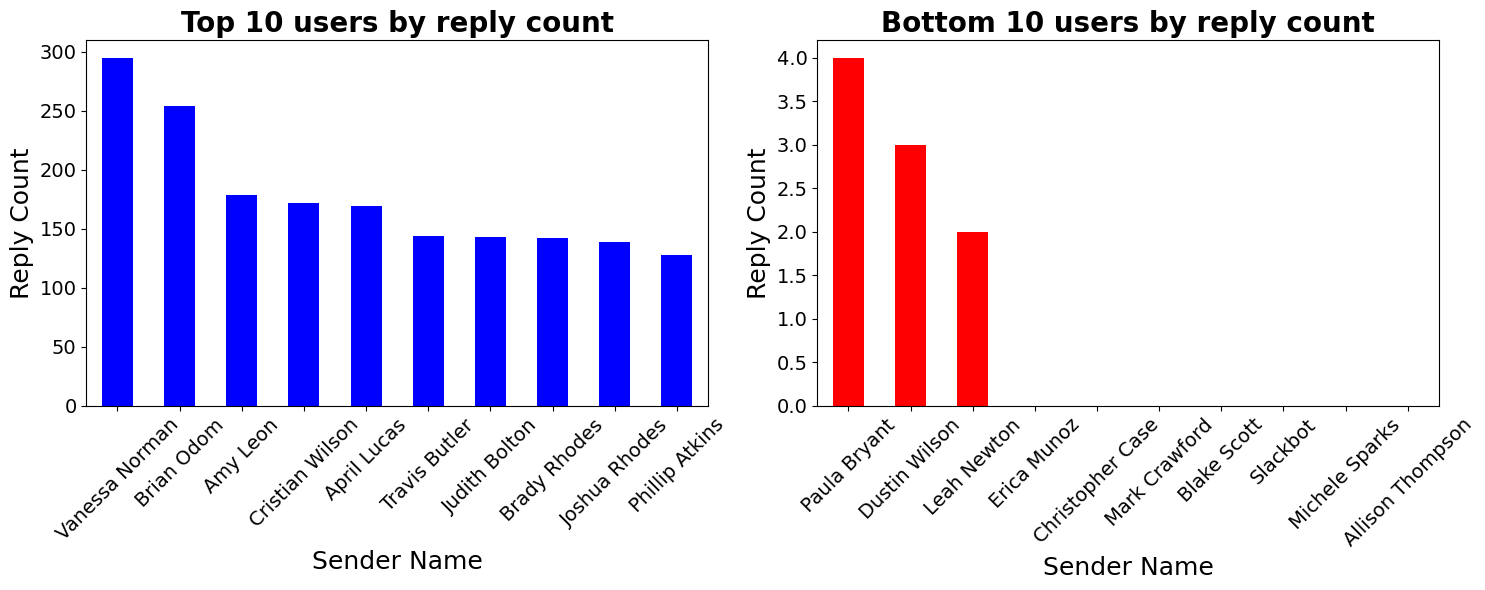

In [94]:
grouped_data = df.groupby('sender_name')['reply_count'].sum()
top_10_users = grouped_data.sort_values(ascending=False)[:10]
bottom_10_users = grouped_data.sort_values(ascending=False)[-10:]

# Plotting the top 10 users
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
top_10_users.plot(kind='bar', color='blue')
plt.title('Top 10 users by reply count', size=20, fontweight='bold')
plt.xlabel("Sender Name", size=18)
plt.ylabel("Reply Count", size=18)
plt.xticks(rotation=45, size=14)
plt.yticks(size=14)
# Plotting the bottom 10 users
plt.subplot(1, 2, 2)
bottom_10_users.plot(kind='bar', color='red')
plt.title('Bottom 10 users by reply count', size=20, fontweight='bold')
plt.xlabel("Sender Name", size=18)
plt.ylabel("Reply Count", size=18)
plt.xticks(rotation=45, size=14)
plt.yticks(size=14)

plt.tight_layout()
plt.show()


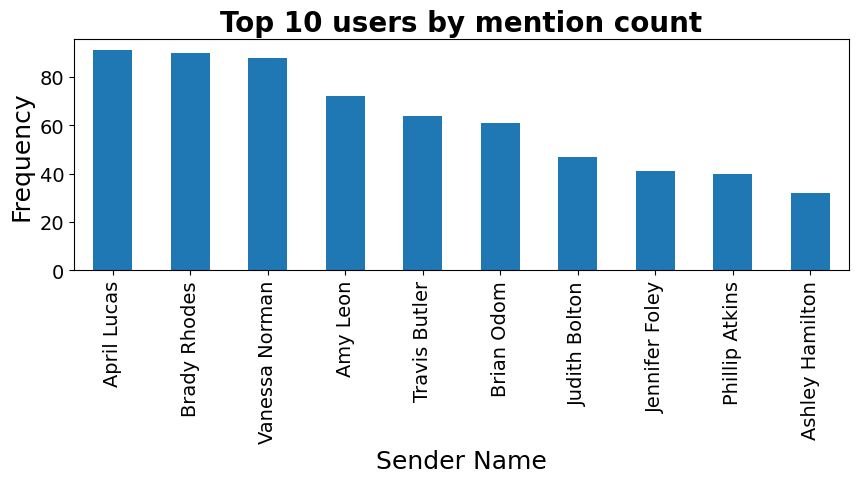

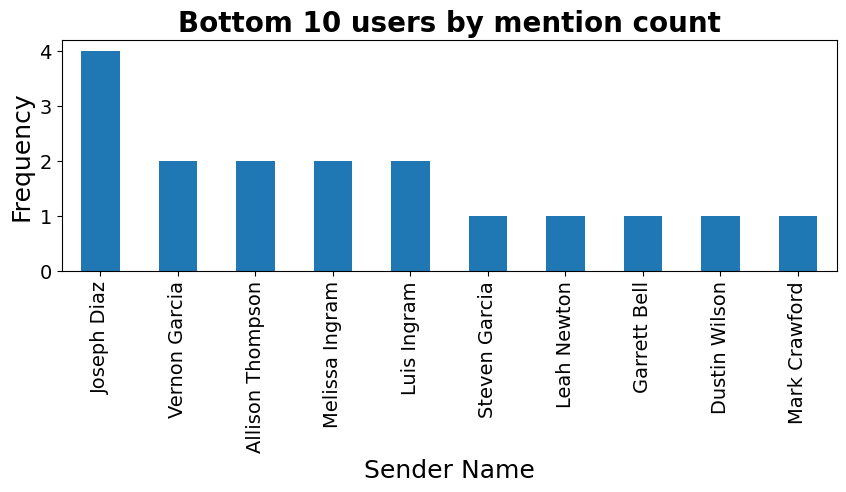

In [95]:
# Top 10 users by mention count
mention_counts = df[df['msg_content'].str.contains('@U\w+')]
mention_counts.groupby('sender_name')['msg_content'].count().sort_values(ascending=False)[:10]\
    .plot(kind='bar', figsize=(10, 3))
plt.title('Top 10 users by mention count', size=20, fontweight='bold')
plt.xlabel("Sender Name", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

# Bottom 10 users by mention count
mention_counts.groupby('sender_name')['msg_content'].count().sort_values(ascending=False)[-10:]\
    .plot(kind='bar', figsize=(10, 3))
plt.title('Bottom 10 users by mention count', size=20, fontweight='bold')
plt.xlabel("Sender Name", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()


In [96]:
#for the top 10 messages by replies
top = df.groupby('msg_content')['reply_count'].sum().sort_values(ascending = False)[:10]
print('The top 10 messages by reply count are\n{}\n'.format(top))
#for bottom 10 messages by reply coount
bott = df.groupby('msg_content')['reply_count'].sum().sort_values(ascending = False)[-10:]
print('The bottom 10 messages by reply count are\n{}\n'.format(bott))

The top 10 messages by reply count are
msg_content
<@U03V1AM5TFA> how many crushes you have?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   75
First Impression: People think I am older than I am,\nWhy: My hairline                                                                                                                                                

In [97]:
#top and bottom 10 messages by mentions are
mention_count = df['msg_content'].str.count(r'@\w+')
df['mention_count'] = mention_count
top_10_messages = df[['msg_content', 'mention_count']].nlargest(10, 'mention_count')
bot_10_messages = df[['msg_content', 'mention_count']].nsmallest(10, 'mention_count')
print('The top 10 messages by mention count are:\n{}\n'.format(top_10_messages))
print('The bottom 10 messages by mention count are:\n{}\n'.format(bot_10_messages))


The top 10 messages by mention count are:
                                            msg_content  mention_count
3802  I am grateful for <@U03U93GNNVB>, <@U03UUN8M4R...             25
3780  Knowing <!here> is just great one way or the o...             20
3761  I am grateful to <@U03U9DB7REG> for answering ...             17
5197  1. Work ethic\n2. How communication and openne...             16
2733  Thanks to the team <@U03UP7V9Q57> <@U03UKL27B0...             12
1773  NEWS NEWS *<!here>*........:drum_with_drumstic...              9
3771  I'm grateful to <@U03UJGRN5E0> <@U03UJGP0C68> ...              8
2717  i would like to thank <@U03U9EJR362> for the p...              7
1962  <!here> the whole community here is verry supp...              6
1980  I sincerely thank <@U03UP7V9Q57> for  her week...              6

The bottom 10 messages by mention count are:
                                         msg_content  mention_count
0  *community Building Session REMINDER!*:timer_c...           

In [98]:
df = pd.DataFrame(data)

# Grouping and Summing
reply_counts = df.groupby(['channel', 'user'])['reply_count'].sum().unstack().fillna(0)

# Selecting Top Users
top_users_per_channel = reply_counts.apply(lambda x: x.nlargest(10))

# Reshaping Data
top_users_per_channel = top_users_per_channel.stack().reset_index()
top_users_per_channel.columns = ['Channel', 'User', 'Reply Count']

# Filtering Top Users List
top_users_list = top_users_per_channel['User'].value_counts().nlargest(10).index
top_users_per_channel = top_users_per_channel[top_users_per_channel['User'].isin(top_users_list)]

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Channel', y='Reply Count', hue='User', data=top_users_per_channel, marker='o')

# Plot Customization
plt.title('Top 10 Users\' Reply Count per Channel')
plt.xlabel('Channel')
plt.ylabel('Reply Count')
plt.xticks(rotation=45)
plt.legend(title='Top 10 Users', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


KeyError: 'channel'

/tmp/ipykernel_6674/744302174.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['msg_sent_time'] = pd.to_datetime(df['msg_sent_time'], unit='s')


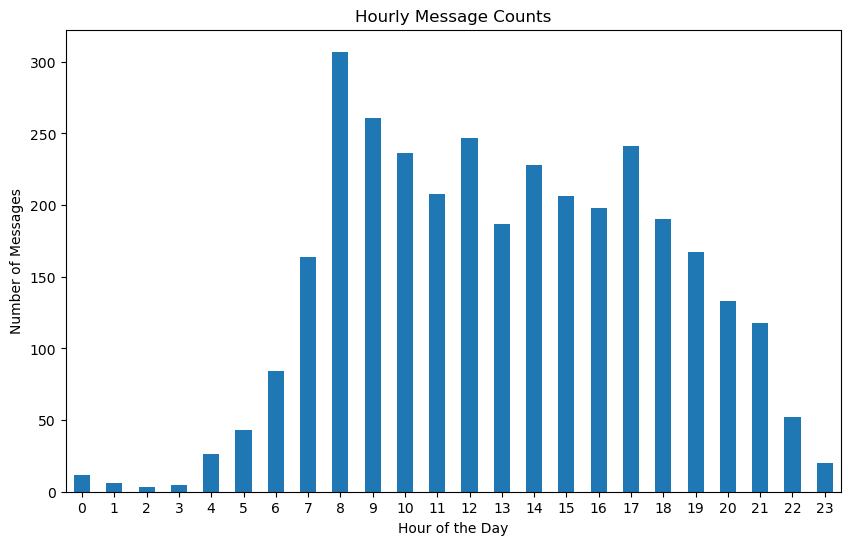

The hour with the most messages is 8:00 with 307 messages.


In [ ]:
# Convert 'msg_sent_time' column to datetime format
df['msg_sent_time'] = pd.to_datetime(df['msg_sent_time'], unit='s')

# Extract hour from message timestamps
df['hour_sent'] = df['msg_sent_time'].dt.hour

# Group messages by hour and count the number of messages in each hour
hourly_message_count = df.groupby('hour_sent').size()

# Find the hour with the maximum number of messages
hour_peak = hourly_message_count.idxmax()
max_messages = hourly_message_count.max()

# Visualize hourly message counts
hourly_message_count.plot(kind='bar', figsize=(10, 6))
plt.title('Hourly Message Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.xticks(rotation=0)
plt.show()

print(f"The hour with the most messages is {hour_peak}:00 with {max_messages} messages.")

In [ ]:
loader = SlackDataLoader('/home/habte/Desktop/Anonymized_B6SlackExport_25Nov23/anonymized/')
df_result = loader.slack_parser('/home/habte/Desktop/Anonymized_B6SlackExport_25Nov23/anonymized')
converted_timestamps = loader.convert_2_timestamp('msg_sent_time', loader.df)
loader.df['msg_sent_time_converted'] = converted_timestamps
print(loader.df)

     msg_type                                        msg_content  \
0     message  *community Building Session REMINDER!*:timer_c...   
1     message                                              Hello   
2     message  We are waiting for Guest Talk to finish, just ...   
3     message                                                 ok   
4     message                                               helo   
...       ...                                                ...   
7608  message  An accident will happen before next week .. an...   
7609  message            So better submit it before the accident   
7610  message  You can give it to your crush , remember it sh...   
7611  message                                               Haha   
7612  message  Did I say next week? I meant last week .. my p...   

           sender_name      msg_sent_time msg_dist_type  time_thread_start  \
0       Vanessa Norman  1667908201.093329          text                  0   
1         Daniel Brown  166

In [ ]:
# Assuming df_result contains labeled data with 'sender_name' and 'reply_count' columns
user_reply_counts = df_result.groupby('sender_name')['reply_count'].sum()

# Find the user with the highest number of reply counts
user_with_highest_replies = user_reply_counts.idxmax()
highest_reply_count = user_reply_counts.max()

print(f"The user with the highest number of reply counts is {user_with_highest_replies} with {highest_reply_count} replies.")


The user with the highest number of reply counts is Vanessa Norman with 295 replies.


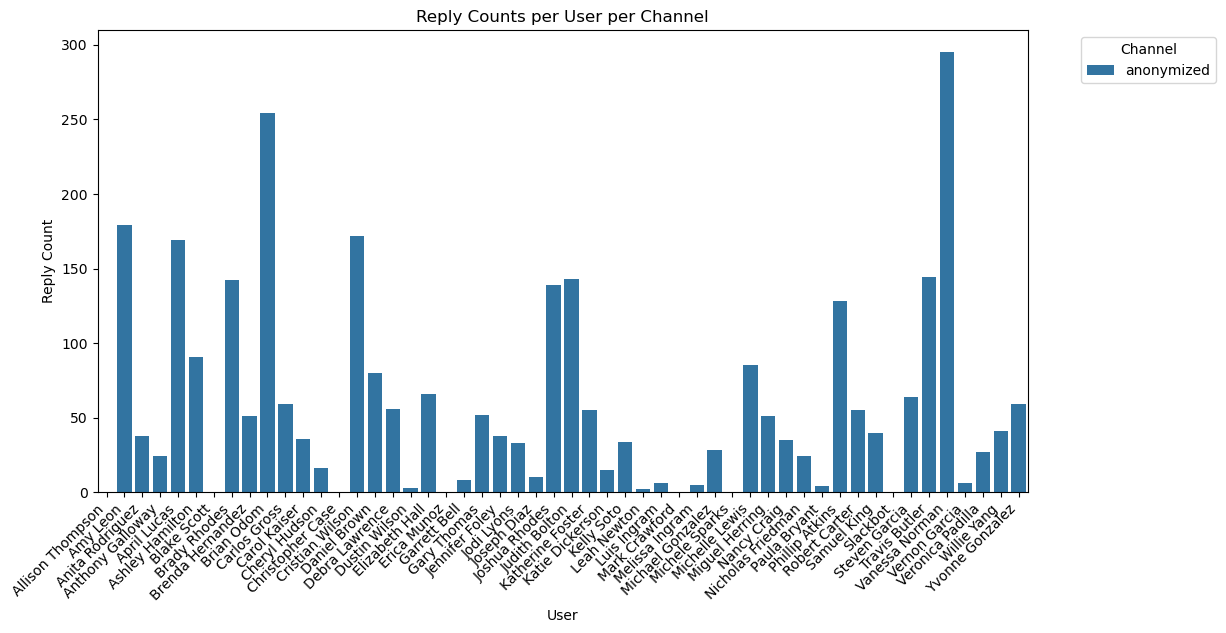

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'channel' and 'sender_name' and sum up 'reply_count'
user_channel_reply_counts = df_result.groupby(['channel', 'sender_name'])['reply_count'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='sender_name', y='reply_count', hue='channel', data=user_channel_reply_counts)
plt.title('Reply Counts per User per Channel')
plt.xlabel('User')
plt.ylabel('Reply Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


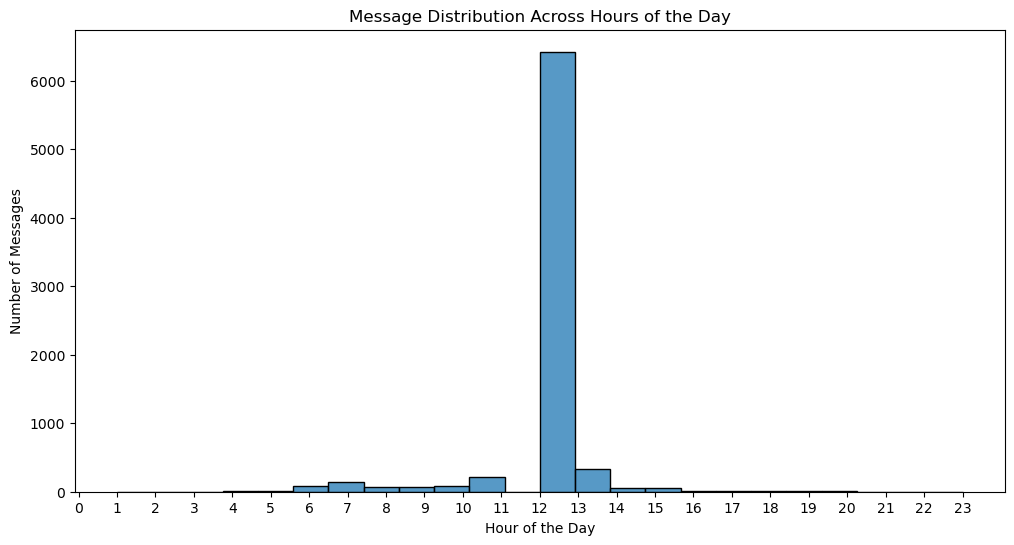

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'msg_sent_time' column to datetime format
df_result['msg_sent_time'] = pd.to_datetime(df_result['msg_sent_time'], unit='s')

# Extract hour from message timestamps
df_result['hour_sent'] = df_result['msg_sent_time'].dt.hour

# Plot the histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_result['hour_sent'], bins=24, kde=False)
plt.title('Message Distribution Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.xticks(range(24))

plt.show()


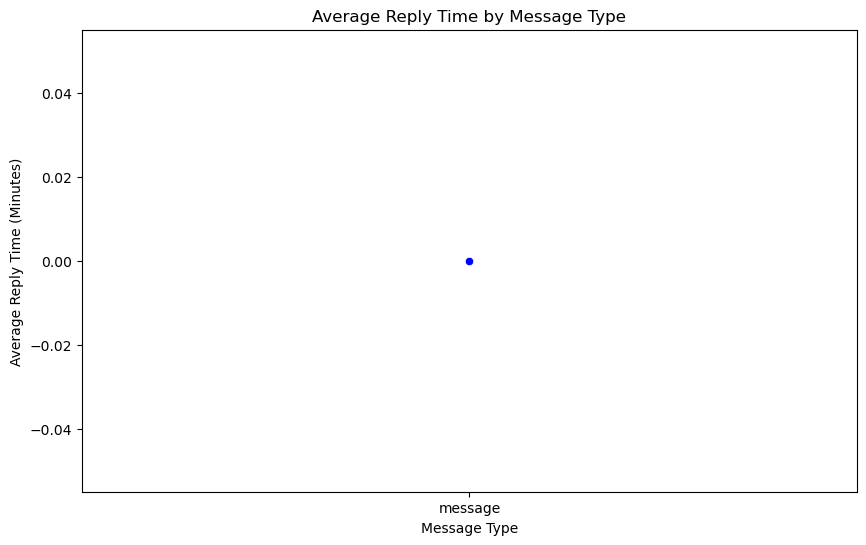

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

df_result['msg_sent_time'] = pd.to_datetime(df_result['msg_sent_time'], unit='s')
df_result['time_thread_start'] = pd.to_datetime(df_result['time_thread_start'], unit='s')

# Filter messages with replies
replied_msg = df_result[df_result['reply_count'] != 0].copy()  # Use .copy() to create a copy

# Calculate time difference
time_difference = replied_msg['time_thread_start'] - replied_msg['msg_sent_time']

# Add a new column for reply time in minutes using .loc to avoid SettingWithCopyWarning
replied_msg.loc[:, 'reply_time_minutes'] = time_difference / timedelta(minutes=1)

# Group by message type and calculate average reply time
avg_reply_time_by_type = replied_msg.groupby('msg_type')['reply_time_minutes'].mean().reset_index()

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='msg_type', y='reply_time_minutes', data=avg_reply_time_by_type, color='blue')
plt.title('Average Reply Time by Message Type')
plt.xlabel('Message Type')
plt.ylabel('Average Reply Time (Minutes)')

plt.show()


In [ ]:
loader = SlackDataLoader('/home/habte/Desktop/Anonymized_B6SlackExport_25Nov23/anonymized/')
df_reaction = loader.parse_slack_reaction('/home/habte/Desktop/Anonymized_B6SlackExport_25Nov23/anonymized', 'random_channel')

print("Columns in df_result:", df_result.columns)
print("Columns in df_reaction:", df_reaction.columns)

# Assuming 'Message' is the correct merging key
merged_df = pd.merge(df_result, df_reaction, left_on='message', right_on='Message', how='left')


In [124]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

documents = df_result['msg_content'].fillna('').values

# Create a vectorizer to convert text data to a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(documents)

# Fit an LDA model
num_topics = 5  # You can adjust the number of topics based on your data
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")


Topic #1: joy, grinning, session, time, cbs, 12, pm, love, 30, community
Topic #2: 10, man, week, high, low, thank, hi, today, guys, thanks
Topic #3: rolling_on_the_floor_laughing, hello, https, high, com, u03v1am5tfa, low, lol, haha, www
Topic #4: good, yes, don, know, morning, did, grin, u03ug32j3pc, think, yeah
Topic #5: sweat_smile, like, meet, u03ud68rqh3, happy, google, lie, say, just, ready


In [125]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

documents = df_result['msg_content'].fillna('').values

# Create a vectorizer to convert text data to a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(documents)

# Fit an LDA model
num_topics = 5  # You can adjust the number of topics based on your data
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Get the dominant topic for each message
df_result['dominant_topic'] = lda.transform(X).argmax(axis=1)


In [ ]:
topic_reaction_counts = merged_df.groupby('dominant_topic')['reaction_count'].sum()

# Sort the topic_reaction_counts in descending order to get the topics with the most reactions
sorted_topic_reaction_counts = topic_reaction_counts.sort_values(ascending=False)

# Display the topics with the most reactions
print(sorted_topic_reaction_counts)


In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming df_result contains labeled data with 'msg_content' and 'msg_type' columns
df_result['category'] = df_result['msg_type'].apply(lambda x: 'message' if x == 'message' else 'non-message')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_result['msg_content'], df_result['category'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Make predictions
predictions = clf.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


Accuracy: 1.0
              precision    recall  f1-score   support

     message       1.00      1.00      1.00      1523

    accuracy                           1.00      1523
   macro avg       1.00      1.00      1.00      1523
weighted avg       1.00      1.00      1.00      1523



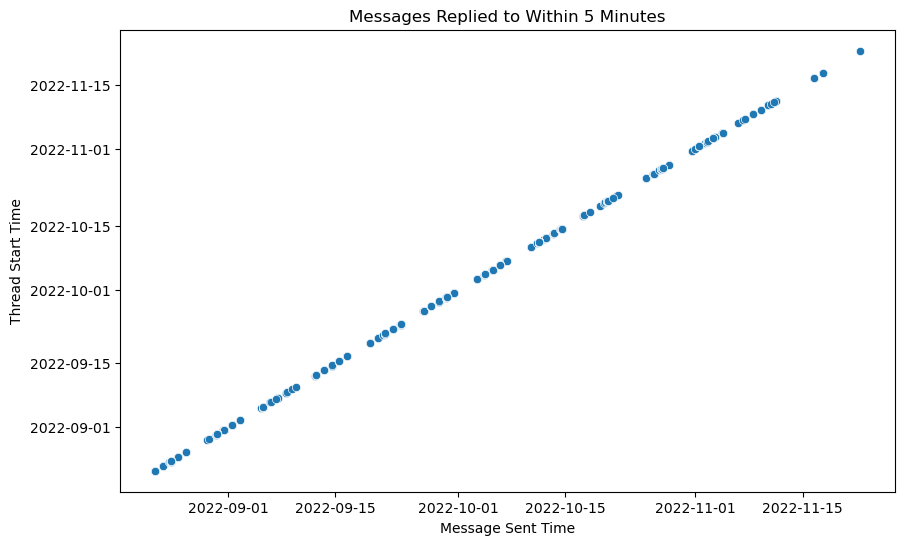

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame has 'channel', 'user', 'reply_count', 'msg_sent_time', and 'time_thread_start'
# For example, you might have loaded data into df_result using the SlackDataLoader

# Convert timestamps to datetime
df_result['msg_sent_time'] = pd.to_datetime(df_result['msg_sent_time'], unit='s')
df_result['time_thread_start'] = pd.to_datetime(df_result['time_thread_start'], unit='s')

# Filter messages with replies
replied_msg = df_result[df_result['reply_count'] != 0]

# Calculate time difference
time_difference = replied_msg['time_thread_start'] - replied_msg['msg_sent_time']

# Filter messages within 5 minutes
messages_within_5_min = replied_msg[time_difference <= pd.Timedelta(minutes=5)]

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='msg_sent_time', y='time_thread_start', data=messages_within_5_min)
plt.title('Messages Replied to Within 5 Minutes')
plt.xlabel('Message Sent Time')
plt.ylabel('Thread Start Time')
plt.show()




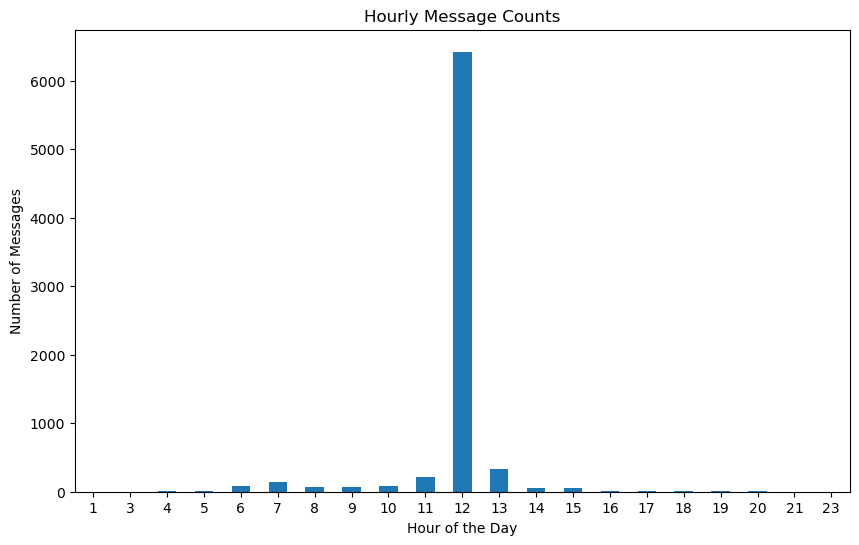

The hour with the most messages is 12:00 with 6423 messages.


In [ ]:
# Convert 'msg_sent_time' column to datetime format
df_result['msg_sent_time'] = pd.to_datetime(df_result['msg_sent_time'], unit='s')

# Extract hour from message timestamps
df_result['hour_sent'] = df_result['msg_sent_time'].dt.hour

# Group messages by hour and count the number of messages in each hour
hourly_message_count = df_result.groupby('hour_sent').size()

# Find the hour with the maximum number of messages
hour_peak = hourly_message_count.idxmax()
max_messages = hourly_message_count.max()

# Visualize hourly message counts
hourly_message_count.plot(kind='bar', figsize=(10, 6))
plt.title('Hourly Message Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.xticks(rotation=0)
plt.show()

print(f"The hour with the most messages is {hour_peak}:00 with {max_messages} messages.")


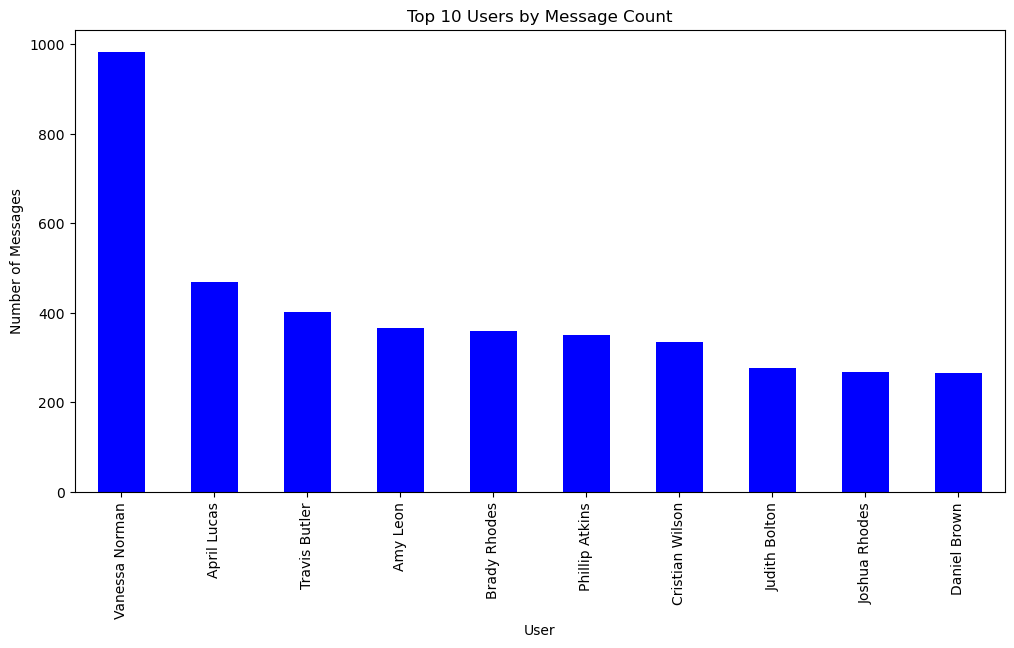

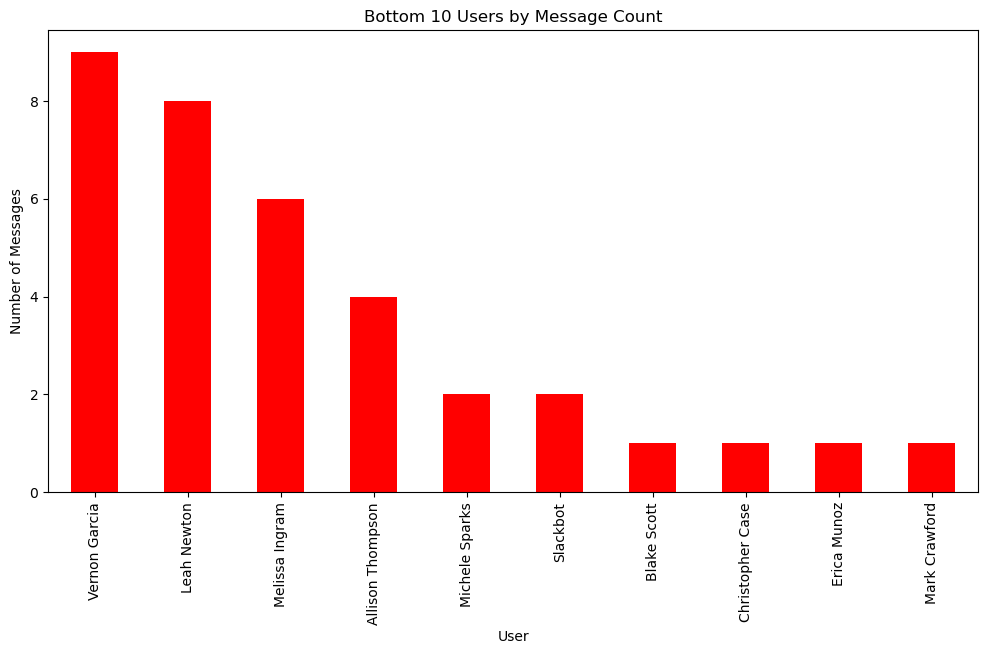

In [ ]:
import matplotlib.pyplot as plt

# Get the top 10 and bottom 10 users by message count
top_users = df_result['sender_name'].value_counts().head(10)
bottom_users = df_result['sender_name'].value_counts().tail(10)

# Plotting the top 10 users
plt.figure(figsize=(12, 6))
top_users.plot(kind='bar', color='blue')
plt.title('Top 10 Users by Message Count')
plt.xlabel('User')
plt.ylabel('Number of Messages')
plt.show()

# Plotting the bottom 10 users
plt.figure(figsize=(12, 6))
bottom_users.plot(kind='bar', color='red')
plt.title('Bottom 10 Users by Message Count')
plt.xlabel('User')
plt.ylabel('Number of Messages')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

df_result['category'] = df_result['msg_type'].apply(lambda x: 'message' if x == 'message' else 'non-message')

X_train, X_test, y_train, y_test = train_test_split(df_result['msg_content'], df_result['category'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Make predictions
predictions = clf.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


Accuracy: 1.0
              precision    recall  f1-score   support

     message       1.00      1.00      1.00      1523

    accuracy                           1.00      1523
   macro avg       1.00      1.00      1.00      1523
weighted avg       1.00      1.00      1.00      1523



In [ ]:
print(df_result.columns)


Index(['msg_type', 'msg_content', 'sender_name', 'msg_sent_time',
       'msg_dist_type', 'time_thread_start', 'reply_count',
       'reply_users_count', 'reply_users', 'tm_thread_end',
       'msg_sent_time_timestamp', 'time_thread_start_timestamp', 'channel',
       'msg_sent_time_converted', 'hour_sent'],
      dtype='object')


In [ ]:
import pandas as pd

# Convert timestamps to datetime
df_result['msg_sent_time'] = pd.to_datetime(df_result['msg_sent_time'], unit='s')
df_result['time_thread_start'] = pd.to_datetime(df_result['time_thread_start'], unit='s')

# Filter messages with replies
replied_msg = df_result[df_result['reply_count'] != 0]

# Calculate time difference
time_difference = replied_msg['time_thread_start'] - replied_msg['msg_sent_time']

# Filter messages within 5 minutes
messages_within_5_min = replied_msg[time_difference <= pd.Timedelta(minutes=5)]

# Print or further process the filtered DataFrame
print(messages_within_5_min)


/tmp/ipykernel_13211/1499549618.py:7: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_result['msg_sent_time'] = pd.to_datetime(df_result['msg_sent_time'], unit='s')


     msg_type                                        msg_content  \
2     message  We are waiting for Guest Talk to finish, just ...   
7     message                            How was the Guest Talk?   
13    message  LinkedIn ? About 2 months ago I think.\n<@U03V...   
31    message  Let's follow each other. Drop your link in thi...   
84    message                                   It's CBS o'clock   
...       ...                                                ...   
7561  message  When I was  in campus, I needed morning for a ...   
7575  message  *My mum doesn't know I've been arrested twice,...   
7577  message  So it was back in 2020, my sister's wedding wa...   
7591  message  I broke an expensive tool and hide it.. They a...   
7592  message  May i have your dad's address now:grinning:\nI...   

           sender_name       msg_sent_time msg_dist_type   time_thread_start  \
2       Vanessa Norman 2022-11-08 12:11:44          text 2022-11-08 12:11:44   
7       Vanessa Norman 

/tmp/ipykernel_13211/1499549618.py:8: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_result['time_thread_start'] = pd.to_datetime(df_result['time_thread_start'], unit='s')


In [ ]:
print(df_result['msg_content'].head())


0    *community Building Session REMINDER!*:timer_c...
1                                                Hello
2    We are waiting for Guest Talk to finish, just ...
3                                                   ok
4                                                 helo
Name: msg_content, dtype: object


In [ ]:
print(df_result['msg_type'].head())

0    message
1    message
2    message
3    message
4    message
Name: msg_type, dtype: object


In [ ]:
#filter messages with time difference less than or equal to 5 minutes
messages_within_5_min = replied_msg[time_difference <= pd.Timedelta(minutes=5)]
#calculate the fraction of messages replied within 5 minutes
fraction_replied_within_5_min = len(messages_within_5_min) / len(df) if len(df) != 0 else 0
print(f"Fraction of messages replied within 5 minutes: {fraction_replied_within_5_min*100}")

Fraction of messages replied within 5 minutes: 9.30809105251296


In [ ]:
messages_within_5_min['hour_sent'] = messages_within_5_min['msg_sent_time'].dt.hour

plt.figure(figsize=(10,8))
plt.scatter(
    (messages_within_5_min['time_thread_start'] - messages_within_5_min['msg_sent_time']).dt.total_seconds() / 60,
    messages_within_5_min['hour_sent'],
    # c=messages_within_5_min['channel_label'],
    cmap='viridis',
    alpha=0.7
)

plt.xlabel('Time difference in mins')
plt.ylabel('time of the day(24hrs)')
plt.title('messages replied within 5 mins')

# plt.colorbar(label='Channel')
plt.grid(True)
plt.show()

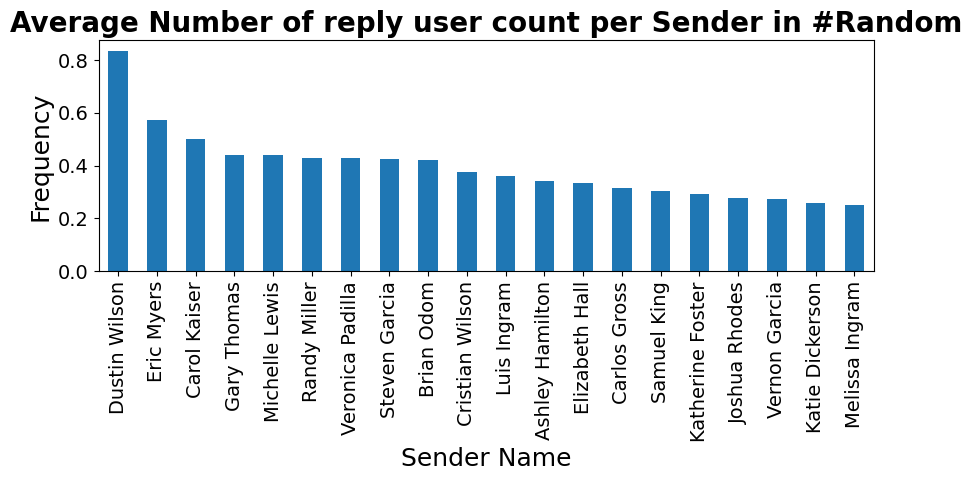

In [ ]:
plotter.draw_avg_reply_users_count(df)

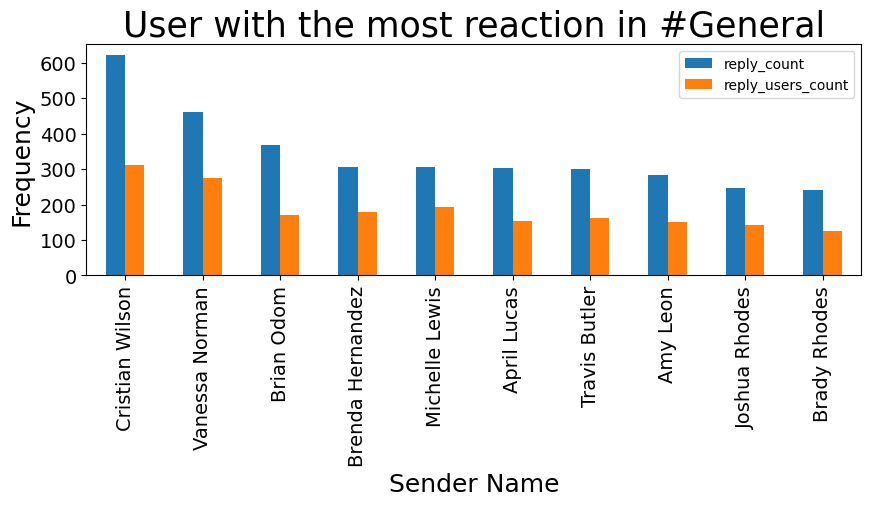

In [ ]:
plotter.draw_user_reaction(df)

## Insight Extraction

Below are some useful questions to answer. Feel free to explore to answer other interesting questions that may be of help to get insight about student's behaviour, need, and future performance 

In [ ]:
X = df['sender_name'].value_counts()[:10]
Y = df['sender_name'].value_counts()[-10:]

print('the top 10 users by message count are: \n{}'.format(X))
print(f'and the users from the bottom 10 are: \n{Y}')

the top 10 users by message count are: 
sender_name
Brenda Hernandez    325
Travis Butler       294
Cristian Wilson     283
Amy Leon            244
Michelle Lewis      171
Brady Rhodes        149
Judith Bolton       145
Joshua Rhodes       141
Brittany Garcia     120
Phillip Atkins      111
Name: count, dtype: int64
and the users from the bottom 10 are: 
sender_name
Patricia Thomas      3
Melissa Ingram       3
Samantha Lee         3
Leah Newton          2
Willie Yang          2
Randy Miller         2
Allison Thompson     1
Patrick Hernandez    1
David Scott          1
Vernon Garcia        1
Name: count, dtype: int64
